In [2]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

importing

In [4]:
! pip install -q kaggle

In [5]:
! mkdir -p ~/.kaggle

In [6]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [7]:
! cp kaggle.json ~/.kaggle/

In [8]:
! chmod 600 /root/.kaggle/kaggle.json

In [9]:
! kaggle datasets list

ref                                                                title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                                     Apple Quality                                       170KB  2024-01-11 14:31:07           8613        210  1.0              
bhavikjikadara/loan-status-prediction                              Loan Status Prediction                                5KB  2024-02-02 13:27:20            619         25  1.0              
hummaamqaasim/jobs-in-data                                         Jobs and Salaries in Data Science                    76KB  2023-12-25 20:03:32          14567        258  1.0              
asaniczka/video-game-sales-2024              

In [10]:
! kaggle datasets download -d tongpython/cat-and-dog

100% 217M/218M [00:01<00:00, 182MB/s]
100% 218M/218M [00:01<00:00, 167MB/s]


In [11]:
! unzip -q /content/cat-and-dog.zip

MODEL BUILDING

In [12]:
model=tf.keras.models.Sequential()

In [18]:
#1st cnn
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(32,32,3)))

In [19]:
#maxpool
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

In [20]:
#2nd cnn
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

In [21]:
#maxpool
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

In [22]:
model.add(tf.keras.layers.Flatten())

In [23]:
model.add(tf.keras.layers.Dropout(0.4))

In [24]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [25]:
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [26]:
#compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
training_data_dir='/content/training_set/training_set'
testing_data_dir='/content/test_set/test_set'

In [36]:
#rescale
datagen=ImageDataGenerator(rescale=1./255)

In [37]:
training_set=datagen.flow_from_directory(directory=training_data_dir, target_size=(32,32), classes=['dogs','cats'], class_mode='binary',batch_size=20)
testing_set=datagen.flow_from_directory(directory=testing_data_dir, target_size=(32,32), classes=['dogs','cats'], class_mode='binary',batch_size=20)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [38]:
len(training_set), len(testing_set)

(401, 102)

In [39]:
len(training_set)*20, len(testing_set)*20

(8020, 2040)

In [42]:
testing_set.batch_size

20

In [43]:
history=model.fit_generator(generator=training_set, steps_per_epoch=401, epochs=20, validation_data=testing_set, validation_steps=102)

Epoch 1/20


<ipython-input-43-3381c4cf7bf5>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=training_set, steps_per_epoch=401, epochs=20, validation_data=testing_set, validation_steps=102)


401/401 [==============================] - 39s 95ms/step - loss: 0.6861 - accuracy: 0.5343 - val_loss: 0.6626 - val_accuracy: 0.5848
Epoch 2/20
401/401 [==============================] - 37s 93ms/step - loss: 0.6390 - accuracy: 0.6347 - val_loss: 0.6256 - val_accuracy: 0.6555
Epoch 3/20
401/401 [==============================] - 45s 111ms/step - loss: 0.5866 - accuracy: 0.6903 - val_loss: 0.5923 - val_accuracy: 0.6901
Epoch 4/20
401/401 [==============================] - 61s 152ms/step - loss: 0.5401 - accuracy: 0.7254 - val_loss: 0.5459 - val_accuracy: 0.7311
Epoch 5/20
401/401 [==============================] - 50s 124ms/step - loss: 0.5007 - accuracy: 0.7565 - val_loss: 0.5133 - val_accuracy: 0.7528
Epoch 6/20
401/401 [==============================] - 43s 107ms/step - loss: 0.4642 - accuracy: 0.7751 - val_loss: 0.5104 - val_accuracy: 0.7489
Epoch 7/20
401/401 [==============================] - 40s 99ms/step - loss: 0.4196 - accuracy: 0.8070 - val_loss: 0.5542 - val_accuracy: 0.7504

In [49]:
def learning_curve(history, epoch):
  #train vs validation Accuracy
  epoch_range=range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

   #train vs validation Loss
  epoch_range=range(1, epoch+1)
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

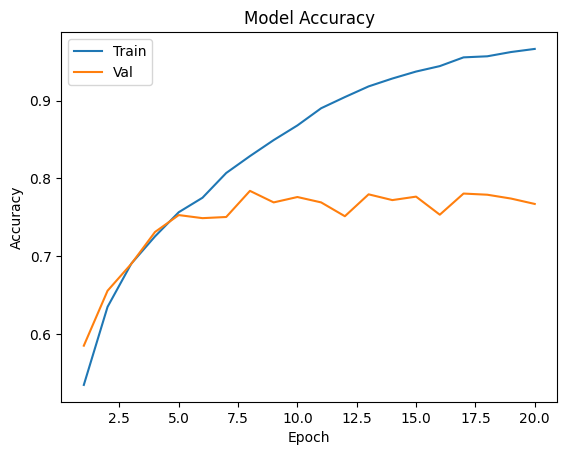

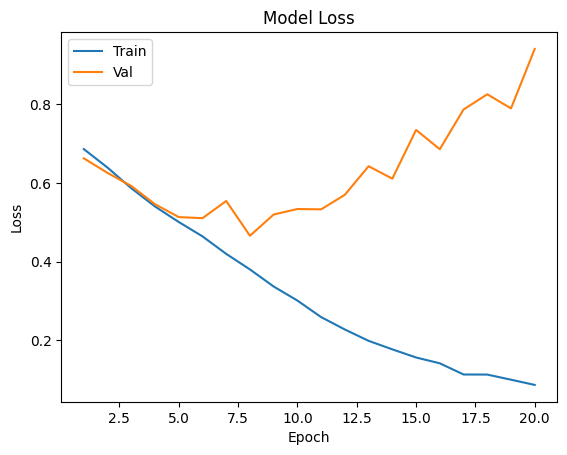

In [50]:
learning_curve(history, 20)